In [14]:
""" 
 cd .\gmm\
jupyter nbconvert --to markdown gmm_model.ipynb --output README.md

 """
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

(2000, 2)
(2000, 3)


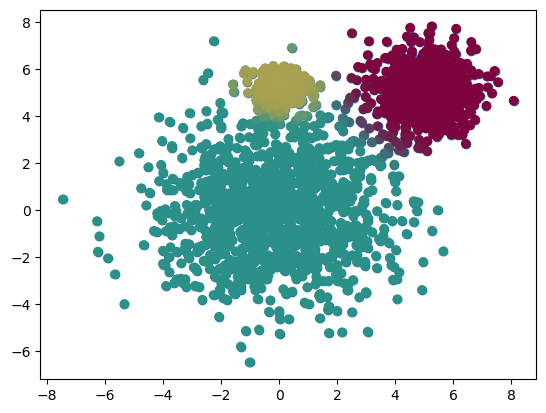

In [24]:
def main():
	D = 2 # dimension
	s=5 # cluster separation control
	mu1 = np.array([0,0])
	mu2 = np.array([s,s])
	mu3 = np.array([0,s])
	
	N = 2000 # sample
	X = np.zeros((N,D))
	print(X.shape)
	X[:1200,:] = np.random.randn(1200,D)*2 + mu1
	X[1200:1800,:] = np.random.randn(600,D) + mu2
	X[1800:,:] = np.random.randn(200,D)*0.5 + mu3

	plt.scatter(X[:,0],X[:,1])

	K = 3 # no of cluster
	gmm(X,K)

def gmm(X,K,max_itr=20,smoothing=1e-2):
	N,D = X.shape
	M = np.zeros((K,D)) # mean
	R = np.zeros((N,K)) # responsibilities of each N data point in each cluster K
	C = np.zeros((K,D,D)) #covariance
	pi = np.ones(K) / K	# prior probabilities of belonging to any particular gaussian; uniform [0.33333333 0.33333333 0.33333333]

# initialize M to random, init C to spherical with variance 1
	for k in range(K):
		M[k] = X[np.random.choice(N)]
		C[k] = np.eye(D)
		
	lls = [] ## log-likelihood
	weighted_pdfs = np.zeros((N,K)) # to store the PDF value of sample N
	print(weighted_pdfs.shape)
	for i in range(max_itr):
		# step1: determine assignments/responsibilities
		# for each cluster
		for k in range(K):
			weighted_pdfs[:,k] = pi[k] * multivariate_normal.pdf(X,M[k],C[k])
		R = weighted_pdfs/weighted_pdfs.sum(axis=1,keepdims=True)
			
		# step 2: recalculate params
		for k in range(K):
			Nk = R[:,k].sum()
			pi[k] = Nk/N
			M[k]= np.dot(R[:,k],X)/Nk
			
			delta = X - M[k]
			Rdelta = np.expand_dims(R[:,k],-1)*delta
			C[k] = Rdelta.T.dot(delta)/Nk + np.eye(D)*smoothing
	
		ll = np.log(weighted_pdfs.sum(axis=1)).sum()
		lls.append(ll)
		if i>0:
			if np.abs(lls[i]-lls[i-1])< 0.1:
				break
	
	rand_colors = np.random.random((K,3))				
	colors = R.dot(rand_colors)
	plt.scatter(X[:,0],X[:,1],c=colors)

	
	
main()
    